In [1]:
import os, copy, ast
import pandas as pd
from tqdm import tqdm 
tqdm.pandas()
import seaborn as sns

In [2]:
data_dir = '/media/dmlab/My Passport/DATA/sec'
data_filepath = os.path.join(data_dir, 'Data_2022-03-10.csv')
sp500_filepath = os.path.join(data_dir, '2022-03-02_S&P500_List.csv')

10-K, 10-Q, 8-K 스크랩핑 대상: 2022-03-02 기준 S&P 500에 포함된 505개 기업

In [3]:
sp500_df = pd.read_csv(sp500_filepath)
sp500_df.set_index('CIK',inplace=True)
print(len(sp500_df))
sp500_df.head()

505


,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,Founded
CIK,,,,,,,,
66740,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,1902
91142,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,1916
1800,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1888
1551152,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,2013 (1888)
815094,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,1981


In [4]:
df = pd.read_csv(data_filepath)
df['image_urls'] = df['image_urls'].apply(ast.literal_eval)
print(len(df))
df.head()

20545


,CIK,form_type,filing_date,period_of_report,texts_only,image_urls,files_url,form_url,Ticker,CompanyName
0,66740,10-K,2022-02-09,2021-12-31,mmm-202112310000066740falsefalse2021FYP10YP20Y...,[],https://www.sec.gov/Archives/edgar/data/66740/...,https://www.sec.gov/Archives/edgar/data/66740/...,MMM,3M
1,66740,10-K,2021-02-04,2020-12-31,"Common Stock, Par Value $.01 Per Share--12-312...",[],https://www.sec.gov/Archives/edgar/data/66740/...,https://www.sec.gov/Archives/edgar/data/66740/...,MMM,3M
2,66740,10-K,2020-02-06,2019-12-31,"Common Stock, Par Value $.01 Per SharetrueP20Y...",[],https://www.sec.gov/Archives/edgar/data/66740/...,https://www.sec.gov/Archives/edgar/data/66740/...,MMM,3M
3,91142,10-K,2022-02-11,2021-12-31,aos-20211231false0000091142FY2021P3YP3YP5YP1YP...,[https://www.sec.gov/Archives/edgar/data/91142...,https://www.sec.gov/Archives/edgar/data/91142/...,https://www.sec.gov/Archives/edgar/data/91142/...,AOS,A. O. Smith
4,91142,10-K,2021-02-12,2020-12-31,aos-20201231false0000091142FYAOS2020P3YP3YP5YP...,[https://www.sec.gov/Archives/edgar/data/91142...,https://www.sec.gov/Archives/edgar/data/91142/...,https://www.sec.gov/Archives/edgar/data/91142/...,AOS,A. O. Smith


In [5]:
for col in df.columns:
    if col=='texts_only': continue
    print('{}: {}'.format(col, df.iloc[3][col]))

CIK: 91142
form_type: 10-K
filing_date: 2022-02-11
period_of_report: 2021-12-31
image_urls: ['https://www.sec.gov/Archives/edgar/data/91142/000009114222000028/aos-20211231_g1.jpg']
files_url: https://www.sec.gov/Archives/edgar/data/91142/000009114222000028/0000091142-22-000028-index.htm
form_url: https://www.sec.gov/Archives/edgar/data/91142/000009114222000028/aos-20211231.htm
Ticker: AOS
CompanyName: A. O. Smith


2022년 3월 9일까지 업로드된 문서 수집 현황

In [6]:
for form_type in ['10-K', '10-Q', '8-K']:
    print(form_type, len(df[(df['form_type']==form_type)]))

10-K 1429
10-Q 3107
8-K 16009


* 공시기준일(period of report)은 대체로 12월 31일인 경우가 많으나 기업마다 상이하다.
* 아래 케이스와 같이 두번에 걸쳐 공시가 발행되는 경우도 있으나, Business description, MD&A 섹션은 11월에 발행된 공시에만 포함되어 있다.

In [7]:
df[(df['form_type']=='10-K')&(df['CIK']==4127)][['CIK', 'Ticker', 'CompanyName', 'form_type', 'filing_date', 'period_of_report']]

,CIK,Ticker,CompanyName,form_type,filing_date,period_of_report
1187,4127,SWKS,Skyworks,10-K,2022-01-28,2021-10-01
1188,4127,SWKS,Skyworks,10-K,2021-11-24,2021-10-01
1189,4127,SWKS,Skyworks,10-K,2021-01-29,2020-10-02
1190,4127,SWKS,Skyworks,10-K,2020-11-17,2020-10-02
1191,4127,SWKS,Skyworks,10-K,2020-01-27,2019-09-27


In [8]:
# 두번 발행된 공시 예시
df[(df['form_type']=='10-K')&(df['CIK']==4127)]['form_url'].values

array(['https://www.sec.gov/Archives/edgar/data/4127/000000412722000002/swks-20211001.htm',
       'https://www.sec.gov/Archives/edgar/data/4127/000000412721000058/swks-20211001.htm',
       'https://www.sec.gov/Archives/edgar/data/4127/000000412721000015/swks-20201002.htm',
       'https://www.sec.gov/Archives/edgar/data/4127/000000412720000058/swks-20201002.htm',
       'https://www.sec.gov/Archives/edgar/data/4127/000000412720000009/fy1910-kajanuary242020.htm'],
      dtype=object)

로고 이미지도 이미지로 처리되었다는 점을 고려하면 미국 기업 공시 문서에서 이미지가 등장하는 비율은 그리 높지 않다고 볼 수 있다.

In [9]:
for form_type in ['10-K', '10-Q', '8-K']:
    print(form_type, len(df[(df['form_type']==form_type)&(df['image_urls'].apply(lambda x: len(x)>0))]))

10-K 1246
10-Q 1291
8-K 2630


min=1
Median=2.0
max=223


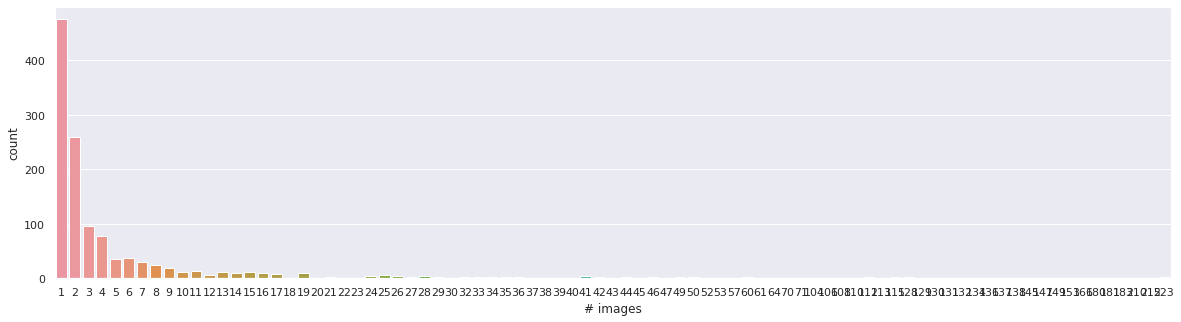

In [15]:
# 1개 이상의 이미지를 포함하는 문서 대상, 최소,Median,최대 이미지 개수
form_type = '10-K'
df['# images'] = df['image_urls'].apply(lambda x: len(x))
print('min={}\nMedian={}\nmax={}'.format(df[(df['form_type']==form_type)&(df['image_urls'].apply(lambda x: len(x)>0))]['# images'].min(), \
    df[(df['form_type']==form_type)&(df['image_urls'].apply(lambda x: len(x)>0))]['# images'].median(), \
    df[(df['form_type']==form_type)&(df['image_urls'].apply(lambda x: len(x)>0))]['# images'].max()))

sns.set(rc = {'figure.figsize':(20,5)})
plot = sns.countplot(x='# images', data=df[(df['form_type']==form_type)&(df['image_urls'].apply(lambda x: len(x)>0))])

In [16]:
# 이미지 예시
df[(df['form_type']==form_type)&(df['image_urls'].apply(lambda x: len(x)>0))]['image_urls'].values

array([list(['https://www.sec.gov/Archives/edgar/data/91142/000009114222000028/aos-20211231_g1.jpg']),
       list(['https://www.sec.gov/Archives/edgar/data/91142/000009114221000025/aos-20201231_g1.jpg']),
       list(['https://www.sec.gov/Archives/edgar/data/91142/000119312520046736/g846284dsp016.jpg']),
       ...,
       list(['https://www.sec.gov/Archives/edgar/data/1555280/000155528022000078/zts-20211231_g1.jpg', 'https://www.sec.gov/Archives/edgar/data/1555280/000155528022000078/zts-20211231_g2.jpg', 'https://www.sec.gov/Archives/edgar/data/1555280/000155528022000078/zts-20211231_g3.jpg']),
       list(['https://www.sec.gov/Archives/edgar/data/1555280/000155528021000098/zts-20201231_g1.jpg', 'https://www.sec.gov/Archives/edgar/data/1555280/000155528021000098/zts-20201231_g2.jpg', 'https://www.sec.gov/Archives/edgar/data/1555280/000155528021000098/zts-20201231_g3.jpg']),
       list(['https://www.sec.gov/Archives/edgar/data/1555280/000155528020000054/zoetis-20141_chartx41886a06.jp

In [17]:
# 223개 이미지를 갖고있는 문서
print(df[df['# images']==223]['form_url'].values)
df[df['# images']==223][['Ticker', 'CompanyName', 'CIK', '# images', 'form_type', 'filing_date', 'period_of_report']]

['https://www.sec.gov/Archives/edgar/data/50863/000005086321000010/intc-20201226.htm'
 'https://www.sec.gov/Archives/edgar/data/50863/000005086320000011/a12282019q4-10kdocument.htm']


,Ticker,CompanyName,CIK,# images,form_type,filing_date,period_of_report
709,INTC,Intel,50863,223,10-K,2021-01-22,2020-12-26
710,INTC,Intel,50863,223,10-K,2020-01-24,2019-12-28
